<a href="https://colab.research.google.com/github/rubanzasilva/Linear_model_and_nn_from_scratch/blob/main/Linear_model_and_nn_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
#This imports and sets up everything you will need for this notebook
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.2 MB/s eta 0:00:00


In [ ]:
#hide
from fastai.vision.all import *
from fastbook import *
import numpy as np

matplotlib.rc('image', cmap='Greys')

In [ ]:
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

In [ ]:
creds = '{"username":"rubanzasilva","key":"a813913345e829b9b4019a3267ede370"}'

In [ ]:
# for working with paths in Python, I recommend using `pathlib.Path`
from pathlib import Path

cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)

In [ ]:
import os
from pathlib import Path

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle: path = Path('../input/titanic')
else:
    path = Path('titanic')
    if not path.exists():
        import zipfile,kaggle
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)

In [ ]:
path

In [ ]:
path.ls()

Cleaning the data

In [ ]:
df = pd.read_csv(path/'train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


From our previous lessons, we know that we need to multiply each value for every column by some coefficients. But when we look at our data, we see that we have NaN values which is how missing values are represented in pandas.

In some rows for certain columns and we definetly cant multiply the coefficients by a missing value.

Lets check how many values are missing in the dataset by using the is_na function which return True (which is treated as 1 when used as a number and viceversa) for NaN values, so we just add them up for each column.


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

NB: By default pandas sum over the column.

We need to replace the missing values with something for example we can most common value etc., which can be defined by the mode function.For some rows there might be more than one common value, so we choose the 1st value at index 0 with iloc[0].

In [ ]:
modes = df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

Now that we have the value for modes for each column,we can replace the missing numbers with an inplace operation using the pandas fillna function

In [ ]:
df.fillna(modes,inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

As we can see there are no missing values left.

We can use another pandas method describe to get a quick summary of all the numeric columns in our dataset.

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Long tail distributions

We usually have to watch out for long tailed distributions for example fare where most of the values seem to be between 0 -31 but the max value is 512.3292 which means we have a few large ones, this kind of distribution is usually common for fields that contain monetary values.
Lets view this better with a histogram

This can cause problems for our model as when that column is multiplied with coefficients,the few rows with really big results will dominate the result.

The most common way of dealing with this is to take the logarithm, this squishes the large numbers and makes the distribution more reasonable.However the log(0) is infinite and since our model contains values which are 0, we

<Axes: >

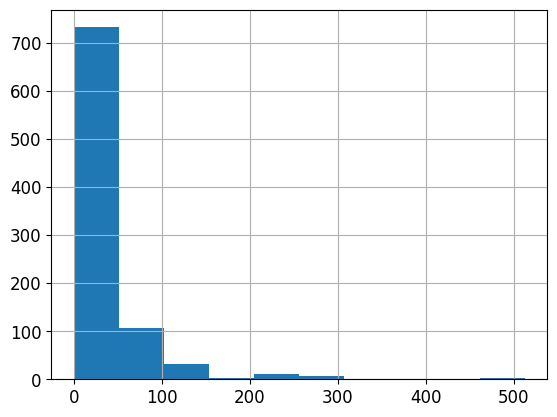

In [ ]:
df['Fare'].hist()

In [ ]:
df['Logfare'] = np.log(df['Fare']+1)

<Axes: >

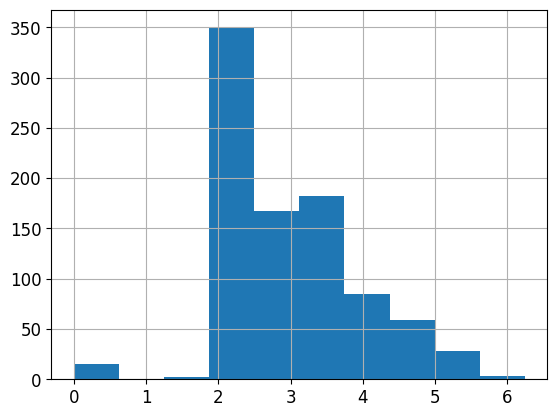

In [ ]:
df['Logfare'].hist()

We should look out for categorical variables such as Pclass which if you notice only has 3 classes which we can confirm by looking at the data dictionary

In [ ]:
pclasses = sorted(df.Pclass.unique())
pclasses

[1, 2, 3]

In [ ]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


So remember that we have to multiply our column values by a coefficient but some columns contain strings like male etc and obviously we cant multiply these by numbers.

To get around these we need to replace those with numbers.
We do that by creating new columns containing dummy variables which is a column that contains 1 where a particular value is true and 0 if it isnt for example is_male would be 1 if Sex is male and 0 if is not.We can do this with the pandas get_dummies which also removes the original columns.

We create dummy variables for Pclass as it is categorical, we also add columns for low cardinality columns sex and Embarked. This also adds columns to the end, one for each of the levels for each column while removing the original columns.

Creating dummy variables for Name, Ticket and Cabin would result in too many columns due to the number of levels.

In [ ]:
df = pd.get_dummies(df,columns=["Sex","Pclass","Embarked"])
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Logfare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Logfare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
added_columns = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [ ]:
df[added_columns]

,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,0,1,0,0,1
1,0,1,1,0,0,1,0,0
2,0,1,0,0,1,0,0,1
3,0,1,1,0,0,0,0,1
4,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,1,0,0,1,0,0,0,1
887,0,1,1,0,0,0,0,1
888,0,1,0,0,1,0,0,1
889,1,0,1,0,0,1,0,0


In [ ]:
df.head(2)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Logfare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,2.110213,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38.0,1,0,PC 17599,71.2833,C85,4.280593,1,0,1,0,0,1,0,0


Now we create our dependent and independent variables which both need to be tensors.

Our dependent variable is survived

In [ ]:
t_dep = tensor(df.Survived)
t_dep.shape

torch.Size([891])

Our independent variables are all the continuous variables of interest + the added columns

In [ ]:
indep_columns = ['Age', 'SibSp', 'Parch', 'Logfare'] + added_columns

t_indep = tensor(df[indep_columns].values,dtype=torch.float)
t_indep

tensor([[22.0000,  1.0000,  0.0000,  2.1102,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [38.0000,  1.0000,  0.0000,  4.2806,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [26.0000,  0.0000,  0.0000,  2.1889,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  1.0000,  0.0000,  3.9908,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  0.0000,  0.0000,  2.2028,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [24.0000,  0.0000,  0.0000,  2.2469,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [54.0000,  0.0000,  0.0000,  3.9677,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        ...,
        [25.0000,  0.0000,  0.0000,  2.0857,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [39.0000,  0.0000,  5.0000,  3.4054

In [ ]:
t_indep.shape

torch.Size([891, 12])

Linear Model

Now that we have our dependent and independent columns, the next step is to make predictions and calculate our loss.We can manually create calculate the predcitions and loss for every row of data. The first model we build shall be a simple linear model.

The first thing we need to do is create coefficients for all columns which we multiply each of their rows.
torch.rand produces 12 random numbers between 0 and 1 and subtracting 0.5 from the resulting values results in random coefficient values in the range (-0.5,0.5).


At first, we shall pick a random number and set the manual seed for reproducibility.



In [ ]:
torch.manual_seed(442)

n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625])

Our predictions will be calculated by multplying the coefficients by each row for all our columns and adding them up. Notice how we also dont have a separate constant terms, that is because our dummy variables cover all use cases i.e for sex there is_male and is_female ensuring all data points are well represented.

In [ ]:
t_indep * coeffs


tensor([[-10.1838,   0.1386,   0.0000,  -0.4772,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-17.5902,   0.1386,   0.0000,  -0.9681,  -0.0000,  -0.3147,   0.4876,   0.0000,   0.0000,  -0.4392,   0.0000,   0.0000],
        [-12.0354,   0.0000,   0.0000,  -0.4950,  -0.0000,  -0.3147,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-16.2015,   0.1386,   0.0000,  -0.9025,  -0.0000,  -0.3147,   0.4876,   0.0000,   0.0000,  -0.0000,   0.0000,   0.3625],
        [-16.2015,   0.0000,   0.0000,  -0.4982,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-11.1096,   0.0000,   0.0000,  -0.5081,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.2103,   0.0000],
        [-24.9966,   0.0000,   0.0000,  -0.8973,  -0.2632,  -0.0000,   0.4876,   0.0000,   0.0000,  -0.0000,   0.0000,   0.3625],
        ...,
        [-11.5725,   0.0000,   0.0000,  -0.4717,  -0.2632,  -0.0000,   0.0000

#Normalization

When we look at our indep_coeffs, we see that the first column has a larger deviation than the rest which will cause some issues when we get the sum of the row values, as the end result will be dominated and influenced by the first column which is age and larger than the rest.

We can ensure all the columns contain values between 0 and 1 by dividing each column by its max():

vals, indices = t_indep.max(dim=0) finds the maximum values alongside the first dimension of tensor t_indep and returns two tensors, vals which contains the maximum values i.e. it takes the columns, returns the maximum value for each column  and indices which contain the indices of the maximum values i.e. it returns the index of the row with the maximum value for each column.

t_indep = t_indep/vals then divides each column value for a particular row by the maxiumum value. If we notice t_indep has a shape of [891, 12] while vals has a shape of [12].

In [ ]:
t_indep[630]

tensor([80.0000,  0.0000,  0.0000,  3.4340,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000])

In [ ]:
vals, indices = t_indep.max(dim=0)
t_indep = t_indep/vals

In [ ]:
t_indep.shape,vals.shape

(torch.Size([891, 12]), torch.Size([12]))

In [ ]:
#vals

In [ ]:
#indices

In [ ]:
vals,indices

(tensor([80.0000,  8.0000,  6.0000,  6.2409,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000]),
 tensor([630, 159, 678, 258,   0,   1,   1,   9,   0,   1,   5,   0]))

In [ ]:
#t_indep = t_indep/vals

In [ ]:
#t_indep.shape

In [ ]:
t_indep*coeffs

tensor([[-0.1273,  0.0173,  0.0000, -0.0765, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2199,  0.0173,  0.0000, -0.1551, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.4392,  0.0000,  0.0000],
        [-0.1504,  0.0000,  0.0000, -0.0793, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0173,  0.0000, -0.1446, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0000,  0.0000, -0.0798, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.1389,  0.0000,  0.0000, -0.0814, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.2103,  0.0000],
        [-0.3125,  0.0000,  0.0000, -0.1438, -0.2632, -0.0000,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        ...,
        [-0.1447,  0.0000,  0.0000, -0.0756, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2257,  0.0000,  0.2008, -0.1234

We now take a look at the new t_indep * coeffs and see that this normalization step helped us solve our problem.

We can now get the predictions by summing up the rows of the product

In [ ]:
preds = (t_indep*coeffs).sum(axis=1)
preds[:10]

tensor([ 0.1927, -0.6239,  0.0979,  0.2056,  0.0968,  0.0066,  0.1306,  0.3476,  0.1613, -0.6285])

So our predictions initially wont be that useful since our intial parameters are all random.

After this we do gradient descent to improve the predictions, so next we calculate how good our parameters are by calculating the loss which is a number we are supposed to minimize.


In [ ]:
loss = torch.abs(preds - t_dep).mean()
loss

tensor(0.5382)

Lets put the functionality for calculating predictions and loss defined above into a couple of functions.

In [ ]:
def calc_preds(coeffs,indeps):
  return (indeps*coeffs).sum(axis=1)

def calc_loss(indeps,coeffs,deps):
  return torch.abs((calc_preds(coeffs,indeps))- deps).mean()

##Gradient Descent

Here we are going to do a single epoch of gradient descent manually apart from calculating gradients.

We ask PyTorch to calcualate gradients for the parameter values by adding requires_grad_() to the parameters which in this case would be our **coeffs** , this enables PyTorch to keep track of the parameter gradients when the parameters are used downstream in a calculation.


In [ ]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [ ]:
loss = calc_loss(coeffs, t_indep,t_dep )
loss

tensor(0.5382, grad_fn=<MeanBackward0>)

We call backward() on the loss to tell PyTorch to compute gradients for us now.

In [ ]:
loss.backward()

We can view the gradients of the parameters using a module called grad as shown below

In [ ]:
coeffs.grad

tensor([-0.0106,  0.0129, -0.0041, -0.0484,  0.2099, -0.2132, -0.1212, -0.0247,  0.1425, -0.1886, -0.0191,  0.2043])

So every time we call backwards, the gradients are added to what has already is already in the grad attribute.

If we go through the above steps again,we notice that the gradients have doubled. Because of this, after we use the current gradients to take a step,we always have to reset our gradients to 0.

In [ ]:
loss = calc_loss(coeffs, t_indep,t_dep )
loss.backward()
coeffs.grad

tensor([-0.0212,  0.0258, -0.0082, -0.0969,  0.4198, -0.4265, -0.2424, -0.0494,  0.2851, -0.3771, -0.0382,  0.4085])

In [ ]:
coeffs.grad

tensor([-0.0212,  0.0258, -0.0082, -0.0969,  0.4198, -0.4265, -0.2424, -0.0494,  0.2851, -0.3771, -0.0382,  0.4085])

Torch.no_grad() disbales gradient tracking to tell PyTorch not to compute gradients when taking the step and adjusting the parameters, while grad.zero() resets gradients to 0.

To Quote geeksforgeeks



> With torch.no_grad() method is like a loop in which every tensor in that loop will have a requires_grad set to False. It means that the tensors with gradients currently attached to the current computational graph are now detached from the current graph and no longer we will be able to compute the gradients with respect to that tensor. Until the tensor is within the loop it is detached from the current graph. As soon as the tensor defined with gradient is out of the loop, it is again attached to the current graph. This method disables the gradient calculation which reduces the memory consumption for computations.




In [ ]:
#codecell g1
loss = calc_loss(coeffs,t_indep,t_dep)
loss.backward()
with torch.no_grad():
  #coeffs -= (coeffs.grad * 0.1)
  coeffs.sub_(coeffs.grad * 0.1)
  coeffs.grad.zero_()
  print(calc_loss(coeffs,t_indep,t_dep))


tensor(0.4945)


Training the Model

Before we begin training, we need to hold out a validation set for calculating metrics.There are multiple ways to do this, i shall try out one of them.

We use **RandomSplitter** to get indices that will split our data into training and validation sets.

This fastai object randomly splits a dataset into train and validation, it takes in arguments to specify the size of the training and validation splits and you can also specify the random seed for reproducibility.

In [ ]:
#from fastai.data.transforms import RandomSplitter
trn_split,val_split = RandomSplitter(seed=42)(df)

In [ ]:
trn_indep, val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep, val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(713, 178)

In [ ]:
len(trn_dep),len(val_dep)

(713, 178)

We redefine our steps in codecell g1 and put them inside functions


```
loss = calc_loss(coeffs,t_indep,t_dep)
loss.backward()
with torch.no_grad():
  coeffs -= (coeffs.grad * 0.1)
  coeffs.sub_(coeffs.grad * 0.1)
  coeffs.grad.zero_()
  print(calc_loss(coeffs,t_indep,t_dep))

```

We shall also redefine the step we took to initiliaze the parameters and put them inside a function.


In [ ]:
def update_coeffs(coeffs,lr):
  coeffs.sub_(coeffs.grad*lr)
  coeffs.grad.zero_()

def one_epoch(coeffs,lr):
  loss = calc_loss(coeffs,trn_indep,trn_dep)
  loss.backward()
  with torch.no_grad():
    update_coeffs(coeffs,lr)
    print(f'{loss:.3f}',end=";")

def init_coeffs():
  #n_coeffs = len(trn_indep)
  return (torch.rand(n_coeff)-0.5).requires_grad_()

def train_model(epochs=30,lr=0.1):
  torch.manual_seed(442)
  coeffs = init_coeffs()
  for i in range(epochs):
    one_epoch(coeffs,lr=lr)
  return coeffs


Our train model function prints out the loss value for every epoch.

In [ ]:
coeffs = train_model(18,0.2)

0.536;0.502;0.477;0.454;0.431;0.409;0.388;0.367;0.349;0.336;0.330;0.326;0.329;0.304;0.314;0.296;0.300;0.289;

In [ ]:
coeffs.shape

torch.Size([12])

In [ ]:
coeffs

tensor([-0.2694,  0.0901,  0.2359,  0.0280, -0.3990,  0.2345,  0.7232,  0.4112,  0.3601,  0.0955,  0.2395,  0.2122], requires_grad=True)

In [ ]:
def show_coeffs(): return dict(zip(indep_columns, coeffs.requires_grad_(False)))
show_coeffs()

{'Age': tensor(-0.2694),
 'SibSp': tensor(0.0901),
 'Parch': tensor(0.2359),
 'Logfare': tensor(0.0280),
 'Sex_male': tensor(-0.3990),
 'Sex_female': tensor(0.2345),
 'Pclass_1': tensor(0.7232),
 'Pclass_2': tensor(0.4112),
 'Pclass_3': tensor(0.3601),
 'Embarked_C': tensor(0.0955),
 'Embarked_Q': tensor(0.2395),
 'Embarked_S': tensor(0.2122)}

Measuring Accuracy

We have been using our loss function to determine how good our model is and sort of acting as our metric here per say, though metrics and loss functions are different. refer to chapter 5 of the mnist book for that.

The kaggle competition specified accuracy as the metric for this titanic competition which is just the proportion of rows for which we correctly predicted survival in the validation set.

We can compute this but first let us calculate our predictions over the validation set.

In [ ]:
preds = calc_preds(coeffs,val_indep)

We make an assumption that anyone with a score of over 0.5 to have survived for example say the pred for a row x is above 0.5 this would result in True for a boolean while if on the other side the label is 1 we know this is True for aboolean, so we compare the result of this boolean for the pred and the boolean for the label and if they match this results in a True or a correct value and vice versa.

In [ ]:
results = val_dep.bool() == (preds>0.5)
results[:16]

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False, False, False,  True,  True, False])

In [ ]:
results[:16]

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False, False, False,  True,  True, False])

In [ ]:
results.shape

torch.Size([178])

Lets take the average accuracy over the whole dataset

When you call results.float(), PyTorch converts the True values to 1.0 and False values to 0.0, resulting in a float tensor: [1.0, 1.0, 1.0, ..., 0.0].

In [ ]:
results.float()

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0.])

In [ ]:
results.float().mean()

tensor(0.7865)

Lets define a function for our accuracy calculation

In [ ]:
def acc(coeffs):
  return (val_dep.bool() == (calc_preds(coeffs,val_indep) > 0.5)).float().mean()

acc(coeffs)

tensor(0.7865)

In [ ]:
#def accs():
  #return (val_dep.bool() == (preds > 0.5)).float().mean()
#accs()

In [ ]:
preds

tensor([ 0.8160,  0.1295, -0.0148,  0.1831,  0.1520,  0.1350,  0.7279,  0.7754,  0.3222,  0.6740,  0.0753,  0.0389,  0.2216,  0.7631,
         0.0678,  0.3997,  0.3324,  0.8278,  0.1078,  0.7126,  0.1023,  0.3627,  0.9937,  0.8050,  0.1153,  0.1455,  0.8652,  0.3425,
         0.1262,  0.7630,  0.8877,  0.9052,  0.1191,  0.0804,  0.7958,  0.9393,  0.3941,  0.9915,  0.1023,  0.7437,  0.1713,  0.1023,
         0.1949,  0.9650,  0.1158,  0.8820,  0.1039,  0.1551,  0.1290,  0.7422,  0.4583,  0.2953,  0.2823,  0.0984,  0.1477,  0.1275,
         0.1295,  0.0759,  0.1124,  0.0900,  0.3338,  0.1366,  0.2824,  0.1124,  0.7358,  0.5246,  0.1554,  0.0564,  0.1290,  0.7183,
         0.0955,  0.7004,  0.1309,  0.1030,  0.4703,  0.1291,  0.1023,  0.4399,  0.1722,  0.0785,  0.2994,  1.1087,  0.1056,  0.1019,
         0.7005,  0.1302,  0.3914,  1.2342,  0.6726,  0.1587,  0.0755,  0.1023,  0.9732, -0.0350,  0.7629, -0.0018,  0.0842,  0.7901,
         0.7697,  0.1458,  0.1730,  0.7630,  0.0753,  0.0821, 

  Sigmoid

  If we look closely at our preds, we shall notice some are > 0 while others are < 0, which leads to issues with our model.

  To counter this, we pass our predictions through the sigmoid function, which has a minimum of zero and a maximum of 1.
  The sigmoid function squishes our large preds to be between 0 and 1.



In [ ]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

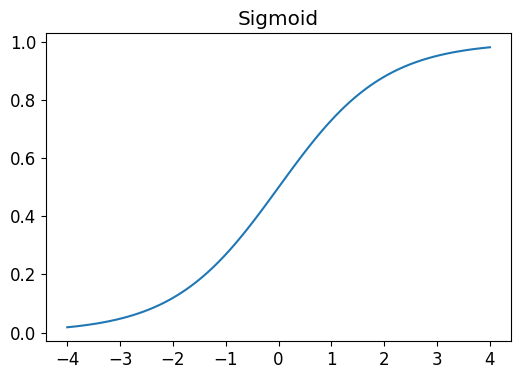

In [ ]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

Lets redefine calc_preds to include the sigmoid provided by PyTorch as torch.sigmoid

In [ ]:
def calc_preds(coeffs,indeps):
  return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [ ]:
coeffs = train_model(20,lr=100)

0.510;0.327;0.294;0.207;0.201;0.199;0.198;0.197;0.196;0.196;0.196;0.195;0.195;0.195;0.195;0.195;0.195;0.195;0.194;0.194;

In the fastai notebook, coeffs = train_model(lr=100), train_model takes one positional argument but returns the losses ?? this should throw an error since we need an epoch argument as per the train_model function definition.

In [ ]:
acc(coeffs)

tensor(0.8258)

The accuracy increased from our last model. Below are the coefficients of our model.

In [ ]:
show_coeffs()

{'Age': tensor(-1.5318),
 'SibSp': tensor(-0.9367),
 'Parch': tensor(-0.2651),
 'Logfare': tensor(0.2400),
 'Sex_male': tensor(-10.2986),
 'Sex_female': tensor(8.1548),
 'Pclass_1': tensor(3.8125),
 'Pclass_2': tensor(1.7747),
 'Pclass_3': tensor(-6.0719),
 'Embarked_C': tensor(1.2491),
 'Embarked_Q': tensor(1.7910),
 'Embarked_S': tensor(-4.4722)}

Trying out the test set


In [ ]:
ls titanic


gender_submission.csv  test.csv  train.csv


In [ ]:
test_df = pd.read_csv(path/'test.csv')

In [ ]:
test_df.shape

(418, 11)

In [ ]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Fare has a missing value so we take care of it by filling it with 0.

In [ ]:
test_df['Fare'] = test_df.Fare.fillna(0)

We now replicate all our preprocessing steps from the training set.

In [ ]:
#test_modes = test_df.mode().iloc[0]
test_df.fillna(modes,inplace=True)
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
LogFare        0
dtype: int64

In [ ]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,LogFare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,28.982057,0.447368,0.392344,35.541956,3.008871
std,120.810458,0.841838,12.887063,0.896760,0.981429,55.867684,0.978026
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,2.185579
50%,1100.500000,3.000000,24.000000,0.000000,0.000000,14.454200,2.737881
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875,3.480373
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,6.240917


<Axes: >

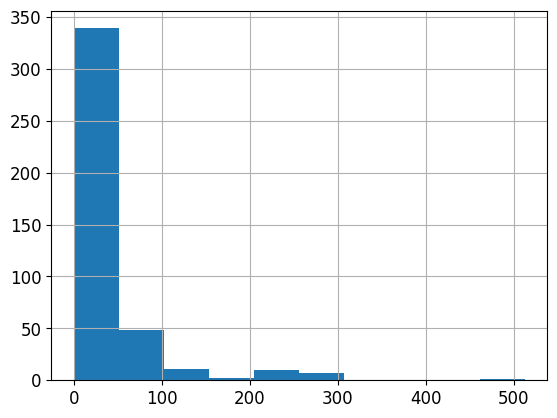

In [ ]:
test_df['Fare'].hist()

<Axes: >

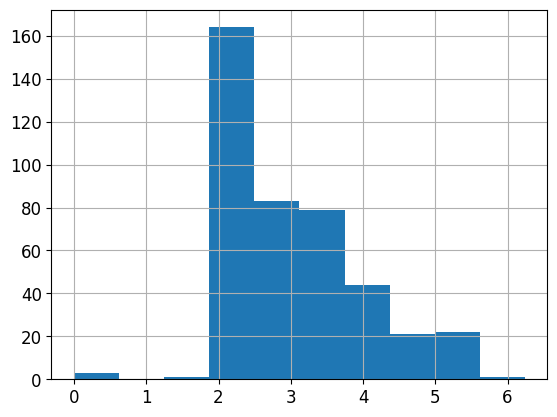

In [ ]:
test_df['LogFare'] = np.log(test_df['Fare'] + 1)
test_df['LogFare'].hist()

In [ ]:
test_df = pd.get_dummies(test_df,columns=["Sex","Pclass","Embarked"])

In [ ]:
test_df.columns

Index(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
#added_columns = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [ ]:
#indep_columns = ['Age', 'SibSp', 'Parch', 'LogFare'] + added_columns

In [ ]:
test_indep = tensor(test_df[indep_columns].values,dtype=torch.float)

In [ ]:
#vals,indices = t_indep.max(dim=0)
test_indep = test_indep / vals

In [ ]:
test_indep.shape

torch.Size([418, 12])

In [ ]:
test_df['Survived'] = (calc_preds(test_indep,coeffs)>0.5).int()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x12 and 418x12)

In [ ]:
acc(coeffs)

tensor(0.8258)

In [ ]:
def calc_preds(coeffs,indeps):
  return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [ ]:
def calc_preds(coeffs,indeps):
  return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [ ]:
calc_preds(coeffs,t_indep)

Matrix Product

Python has an @ operator that is used to do matrix multiplication and this is also supported by PyTorch tensors.

In [ ]:
(val_indep*coeffs).sum(axis=1)

tensor([ 11.3606, -14.9557, -15.4998, -13.1750, -13.3733, -13.6453,   3.3140,   5.0227, -21.3868,   2.8325, -21.3713, -15.6349, -20.9846,
          3.4983, -21.4163, -11.6925, -12.0754,   5.0612, -13.6161,  -2.8955, -21.2182, -11.9031,  12.4899,   4.4939, -21.1455, -15.0321,
         -2.4737, -12.0180, -21.0810,   3.4978,   5.1258,  -3.2206, -21.1225, -21.3420,  11.2458,  -2.8506, -11.7215,  12.9205, -21.2175,
         -2.9009, -13.2660, -21.2175, -13.6566,  12.7709, -21.1410,  -3.2527, -21.1847, -21.2700, -14.9593,  -2.7294,  -5.5984, -21.5400,
        -21.4380, -21.2412, -13.4000, -13.5149, -14.9556, -21.5412, -21.1601, -21.2792,  -5.6822, -21.2051, -12.3581, -21.1606,   4.6245,
        -11.2369, -13.3541, -21.4655, -15.3989,   4.6985, -21.2565,   2.8914, -13.4958, -21.2118, -11.2913, -21.0655, -21.2175, -11.6296,
        -13.2584, -13.7894, -13.1517,  12.7062, -21.1991, -21.2211,   4.5939,  -7.8146,  -5.5180,   7.2060,  10.6493, -13.3350, -21.3694,
        -21.2175,  12.8219, -15.61

In [ ]:
val_indep@coeffs

tensor([ 11.3606, -14.9557, -15.4998, -13.1750, -13.3733, -13.6453,   3.3140,   5.0227, -21.3868,   2.8325, -21.3713, -15.6349, -20.9846,
          3.4983, -21.4163, -11.6925, -12.0754,   5.0612, -13.6161,  -2.8955, -21.2182, -11.9031,  12.4899,   4.4939, -21.1455, -15.0321,
         -2.4737, -12.0180, -21.0810,   3.4978,   5.1258,  -3.2206, -21.1225, -21.3420,  11.2458,  -2.8506, -11.7215,  12.9205, -21.2175,
         -2.9009, -13.2660, -21.2175, -13.6566,  12.7709, -21.1409,  -3.2527, -21.1847, -21.2700, -14.9593,  -2.7294,  -5.5984, -21.5400,
        -21.4380, -21.2412, -13.4000, -13.5149, -14.9556, -21.5412, -21.1601, -21.2792,  -5.6822, -21.2051, -12.3581, -21.1606,   4.6245,
        -11.2369, -13.3541, -21.4655, -15.3989,   4.6985, -21.2565,   2.8914, -13.4958, -21.2118, -11.2913, -21.0655, -21.2175, -11.6296,
        -13.2584, -13.7894, -13.1517,  12.7062, -21.1991, -21.2211,   4.5939,  -7.8146,  -5.5180,   7.2060,  10.6493, -13.3350, -21.3694,
        -21.2175,  12.8219, -15.61

We can replace the above with @ which turns out to be much faster as matrix products are highly optimized in code.

With this we can change how calc_preds is done.

In [ ]:
def calc_preds(coeffs,indeps):
  return torch.sigmoid(indeps@coeffs)

A column vector is a mathematical concept in linear algebra where a vector has only one column and potentially many rows.

In order to do matrix multiplication, we need to turn our coefficients into a column vector to follow matrix multiplication rules.

what happens is that indep*coeffs was doing elementwise multiplication, due tio briadcasting it was able to do this for every row, now for matrix multiplication the dimensions have to match like so [x,y] @ [y,x]

We can turn coeffs into a column vector by passing in a second argument of 1 to torch.rand() indicating we want our coefficients to have 1 column.

We also turn our dependent variable which is a 1d tensor into a column vector by indexing the column dimension with a special value None, which tells PyTorch to add a new dimension to this tensor in that position.

In [ ]:
def init_coeffs():
  return (torch.rand(n_coeff,1)*0.1).requires_grad_()

In [ ]:
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

In [ ]:
val_indep.shape

torch.Size([178, 12])

In [ ]:
coeffs.shape

torch.Size([12])

In [ ]:
coeffs = train_model(10,lr=100)

In [ ]:
acc(coeffs)

tensor(0.4506)

A neural Network

To create our neural network, we are going to use a couple layers.So we start by create coefficients for all the layers, the first layer takes in n_coeff inputs and create n_hidden outputs. We can make n_hidden any number we want depending on the desired complexity, so we need a matrix of n_Coeff by n_hidden.
We divide our coefficients by n_hidden to ensure when we sum them up in the next layer, we get a magnitude of numbers similar to what we started with.

Our next layer will take in as input n_hidden and output a single output meaning we create an n_hidden by 1 matrix here. The second layer also adds a a constant term.

In [ ]:
def init_coeffs(n_hidden=20):
  layer1 = (torch.rand(n_coeff,n_hidden)-0.5)/n_hidden
  layer2 = (torch.rand(n_hidden,1)-0.3)
  const = torch.rand(1)[0]
  return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [ ]:
hiddens = [10, 10]  # <-- set this to the size of each hidden layer you want
sizes = [n_coeff] + hiddens + [1]
n = len(sizes)
n



4

In [ ]:
sizes

[12, 10, 10, 1]

Phind code explain

The code snippet you provided defines the architecture of a neural network model by specifying the sizes of the layers. Here's a breakdown of what each part of the code does:

hiddens = [10, 10]: This line initializes a list called hiddens with two elements, both set to 10. These numbers represent the number of neurons in each hidden layer of the neural network. In this case, there are two hidden layers, each with 10 neurons.


sizes = [n_coeff] + hiddens + [1]: This line constructs a list called sizes that represents the dimensions of each layer in the neural network. It starts with the input size (n_coeff), followed by the sizes of the hidden layers (hiddens), and ends with the output size ([1]), indicating that there is one output neuron.

n = len(sizes): This line calculates the total number of layers in the neural network by finding the length of the sizes list. Each element in the sizes list corresponds to a layer in the neural network.

n: The final line simply evaluates the expression n, which will print out the number of layers in the neural network.

Now that we have our coefficients, we can create our neural network.

In [ ]:
#import torch.nn.functional as F

def calc_preds(coeffs,indeps):
  l1,l2,const = coeffs
  res = F.relu(indeps@l1)
  res = res@l2 + const
  return torch.sigmoid(res)

Finally now that we have more than one set of coefficents, we add a loop to update each one of the layers

In [ ]:
def update_coeffs(coeffs,lr):
  for layer in coeffs:
    layer.sub_(layer_grad*lr)
    layer_grad.zero_()

In [ ]:
coeffs = train_model(lr=1.4)

TypeError: 'int' object is not callable

In [ ]:
coeffs = train_model()

TypeError: 'int' object is not callable

In [ ]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [ ]:
def train_model(epochs=30,lr=0.1):
  torch.manual_seed(442)
  coeffs = init_coeffs()
  for i in range(epochs):
    one_epoch(coeffs,lr=lr)
  return coeffs

Deep learning

Our technique above only covers one layer,so it doesnt count as deep learning but we can use the same technique to make our neural network deeper by adding more matrix multiplications.

First, we create additional coefficients for each layer.

In [ ]:
accs()

NameError: name 'accs' is not defined

In [ ]:
#hide
from fastai.vision.all import *
from fastbook import *
import numpy as np

matplotlib.rc('image', cmap='Greys')

import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

creds = '{"username":"rubanzasilva","key":"a813913345e829b9b4019a3267ede370"}'

# for working with paths in Python, I recommend using `pathlib.Path`
from pathlib import Path
import os

cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)


iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle: path = Path('../input/titanic')
else:
    path = Path('titanic')
    if not path.exists():
        import zipfile,kaggle
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)

df = pd.read_csv(path/'train.csv')
modes = df.mode().iloc[0]
df.fillna(modes,inplace=True)

df['Logfare'] = np.log(df['Fare']+1)

df = pd.get_dummies(df,columns=["Sex","Pclass","Embarked"])
added_columns = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

t_dep = tensor(df.Survived)

indep_columns = ['Age', 'SibSp', 'Parch', 'Logfare'] + added_columns

t_indep = tensor(df[indep_columns].values,dtype=torch.float)

torch.manual_seed(442)

n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

vals, indices = t_indep.max(dim=0)
t_indep = t_indep/vals

pred = (t_indep*coeffs).sum(axis=1)

pred[:10]

tensor([ 0.1927, -0.6239,  0.0979,  0.2056,  0.0968,  0.0066,  0.1306,  0.3476,  0.1613, -0.6285])

NB-Question


We seem to drop our columns with strings and a high cardinality such as name etc when calculating preds etc ? why is this ?

Notes
torch.rand is depreceated and we should use torch.arange(+1)

Acknowledgements

https://www.geeksforgeeks.org/what-is-with-torch-no_grad-in-pytorch/